In [1]:
%matplotlib inline

import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
from scipy.io import wavfile
from featurize import preprocess, extract_chunks, nonsilence_vars

In [2]:
#wavs = glob('wavs/labeled/*.wav')
#wav = random.choice(wavs)

# known to have good rings:
wav = 'wavs/labeled/B-1009-2013-01-17-191847-8.wav'
sample_rate, wav_data = wavfile.read(wav)
wav_data = preprocess(wav_data)
plt.plot(wav_data)

FileNotFoundError: [Errno 2] No such file or directory: 'wavs/labeled/B-1009-2013-01-17-191847-8.wav'

In [ ]:
#wavs = glob('wavs/labeled/*.wav')
#wav = random.choice(wavs)
wav = 'wavs/labeled/B-1009-2013-02-16-165158-10.wav'
sample_rate, wav_data = wavfile.read(wav)
wav_data = preprocess(wav_data)
silences, nonsilences = extract_chunks(wav_data)
nonsilence_variances = nonsilence_vars(nonsilences)
for i, (pos, ns) in enumerate(nonsilences):
    x = pos+200
    plt.text(x=x, y=5000, s=i)
    #plt.text(x=x, y=4500, s='var {:.2E}'.format(np.var(ns)))
    #plt.text(x=x, y=4000, s='max {:.2E}'.format(np.max(ns)))
    #plt.text(x=x, y=3500, s='min {:.2E}'.format(np.min(ns)))
    #plt.text(x=x, y=3000, s='mean {:.2E}'.format(np.mean(ns)))
    #plt.text(x=x, y=2500, s='std {:.2E}'.format(np.std(ns)))
    plt.text(x=x, y=2000, s='len {}'.format(len(ns)))
    dev = 1500
    mean = np.median(ns)
    ns = np.array(ns)
    samps_within = ns[np.where((ns > mean - dev) & (ns < mean + dev))]
    percent_samps_within = len(samps_within)/len(ns)
    plt.text(x=x, y=4500, s='{:.2f}'.format(percent_samps_within))
    print('~~~~~')
    print(percent_samps_within)
    print(len(ns))
plt.plot(wav_data)

In [ ]:
print(wav)

In [3]:
def is_ring(chunk, variance, psl):
    # Estimates if a given nonsilent chunk is a ring
    ring_var_thresh = 2000000
    ring_min_length = sample_rate * 0.75 # ~6000 samples
    ring_min_amp = 4000
    
    if psl < 5000:
        return False
    
    if variance > ring_var_thresh:
        print('\tdid not satisfy variance threshold')
        return False
    print('\tpassed variance', variance)
    
    if len(chunk) < ring_min_length:
        print('\tdid not satisfy length threshold')
        return False
    print('\tpassed length', len(chunk))
    
    if isinstance(chunk, list):
        chunk = np.array(chunk)
        
    dev = 1500 # count values w/in dev of the median
    med = np.median(chunk) # use median as it is a more resilient to outliers
    
    #if med < ring_min_amp:
    #    print('\tdid not satisfy min amp threshold')
    #    return False
    #print('\tpassed min amp', med)
    
    samps_within = chunk[np.where((chunk > med - dev) & (chunk < med + dev))]
    percent_samps_within = len(samps_within)/len(chunk)
    
    if percent_samps_within < 0.7:
        print('\tdid not satisfy percent samp threshold', percent_samps_within)
        return False
    print('\tpassed percent samp', percent_samps_within)
    return True
    
    


In [ ]:
#wavs = glob('wavs/labeled/*.wav')
#wav = random.choice(wavs)
wav = 'wavs/labeled/B-1009-2013-02-16-165158-10.wav'
sample_rate, wav_data = wavfile.read(wav)
wav_data = preprocess(wav_data)
silences, nonsilences = extract_chunks(wav_data)
nonsilence_variances = nonsilence_vars(nonsilences)
for i, ((pos, ns), var) in enumerate(zip(nonsilences, nonsilence_variances)):
    x = pos+200
    plt.text(x=x, y=5000, s=i)
    print(var)
    if is_ring(ns, var):
        plt.text(x=x, y=4000, s='RING')
plt.plot(wav_data)

In [ ]:
wav = 'wavs/labeled/B-1009-2013-01-17-191847-8.wav'
sample_rate, wav_data = wavfile.read(wav)
wav_data = preprocess(wav_data)
silences, nonsilences = extract_chunks(wav_data)
nonsilence_variances = nonsilence_vars(nonsilences)
for i, ((pos, ns), var) in enumerate(zip(nonsilences, nonsilence_variances)):
    x = pos+200
    plt.text(x=x, y=5000, s=i)
    print(var)
    if is_ring(ns, var):
        plt.text(x=x, y=4000, s='RING')
plt.plot(wav_data)

In [ ]:
wavs = glob('wavs/labeled/*.wav')
wav = random.choice(wavs)
sample_rate, wav_data = wavfile.read(wav)
wav_data = preprocess(wav_data)
silences, nonsilences = extract_chunks(wav_data)
nonsilence_variances = nonsilence_vars(nonsilences)
for i, ((pos, ns), var) in enumerate(zip(nonsilences, nonsilence_variances)):
    x = pos+200
    plt.text(x=x, y=5000, s=i)
    print('------', i)
    if is_ring(ns, var):
        plt.text(x=x, y=4000, s='RING')
plt.plot(wav_data)

In [ ]:
print(wav)

------ 0
------ 1
------ 2
	passed variance 1826054.11942
	passed length 8997
	passed percent samp 0.8338335000555741
------ 3
	passed variance 1383722.5956
	did not satisfy length threshold
------ 4
	passed variance 6035.21757402
	did not satisfy length threshold
------ 5
------ 6
	passed variance 937590.969275
	passed length 8950
	passed percent samp 0.8633519553072626
------ 7
	passed variance 642.518250356
	did not satisfy length threshold
------ 8
	passed variance 952768.633295
	passed length 8886
	passed percent samp 0.8620301598019356
------ 9
	passed variance 80518.3725757
	did not satisfy length threshold
------ 10
------ 11
	passed variance 1571233.26697
	passed length 9553
	passed percent samp 0.7708573223071287
------ 12
	passed variance 12898.6398647
	did not satisfy length threshold
------ 13
------ 14
------ 15
------ 16
------ 17
	passed variance 989846.587034
	passed length 9020
	passed percent samp 0.8542128603104213
------ 18
	passed variance 1319840.84679
	did not s

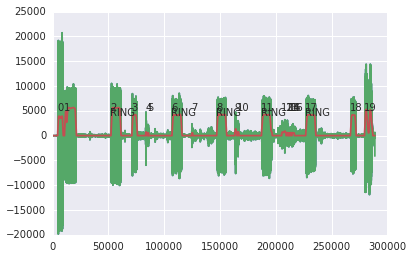

In [46]:
wav = 'wavs/labeled/B-1009-2013-07-06-121630-6.wav'
sample_rate, wav_data = wavfile.read(wav)
plt.plot(wav_data)
wav_data = preprocess(wav_data)
silences, nonsilences = extract_chunks(wav_data)
nonsilence_variances = nonsilence_vars(nonsilences)
preceding_silence_lengths = [next((length for spos, length in silences[::-1] if spos < pos), 0) for pos, ns in nonsilences]
for i, ((pos, ns), var, psl) in enumerate(zip(nonsilences, nonsilence_variances, preceding_silence_lengths)):
    x = pos+200
    plt.text(x=x, y=5000, s=i)
    print('------', i)
    if is_ring(ns, var, psl):
        plt.text(x=x, y=4000, s='RING')
plt.plot(wav_data)

------ 0
------ 1
------ 2
	passed variance 1142609.57571
	passed length 11836
	passed percent samp 0.9080770530584656
------ 3
	passed variance 915664.83801
	passed length 8895
	passed percent samp 0.8643057897695334
------ 4
	passed variance 138156.756834
	passed length 8982
	passed percent samp 1.0
------ 5
------ 6
------ 7
------ 8
------ 9
------ 10
	did not satisfy variance threshold
------ 11
	passed variance 331791.884527
	did not satisfy length threshold
------ 12
	passed variance 256070.550549
	did not satisfy length threshold


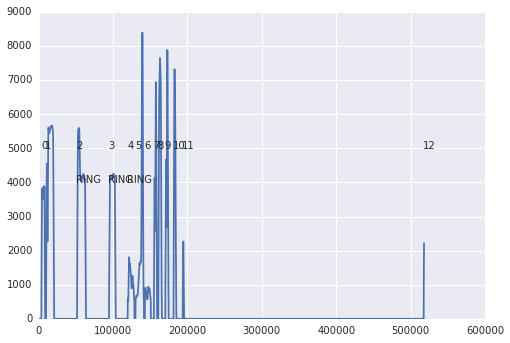

In [6]:
wavs = glob('wavs/labeled/*.wav')
wav = random.choice(wavs)
sample_rate, wav_data = wavfile.read(wav)
wav_data = preprocess(wav_data)
silences, nonsilences = extract_chunks(wav_data)
nonsilence_variances = nonsilence_vars(nonsilences)
preceding_silence_lengths = [next((length for spos, length in silences[::-1] if spos < pos), 0) for pos, ns in nonsilences]
for i, ((pos, ns), var, psl) in enumerate(zip(nonsilences, nonsilence_variances, preceding_silence_lengths)):
    x = pos+200
    plt.text(x=x, y=5000, s=i)
    print('------', i)
    if is_ring(ns, var, psl):
        plt.text(x=x, y=4000, s='RING')
plt.plot(wav_data)

------ 0
------ 1
	passed variance 1471407.72718
	did not satisfy length threshold
------ 2
------ 3
------ 4
------ 5
	passed variance 1638935.06257
	passed length 12581
	passed percent samp 0.7196566250695493
------ 6
	passed variance 283861.891982
	did not satisfy length threshold
------ 7
------ 8
------ 9
------ 10
------ 11
------ 12
------ 13
------ 14
------ 15
------ 16
------ 17
------ 18
	passed variance 18172.9908283
	did not satisfy length threshold
------ 19
	passed variance 147040.158439
	did not satisfy length threshold
------ 20
------ 21
------ 22
------ 23
------ 24
------ 25
	passed variance 1891.30193866
	did not satisfy length threshold
------ 26
------ 27
------ 28
------ 29
	did not satisfy variance threshold
------ 30
	passed variance 3710.26568976
	did not satisfy length threshold
------ 31
------ 32
------ 33
------ 34
------ 35
------ 36
------ 37
------ 38
------ 39
------ 40
------ 41
	did not satisfy variance threshold
------ 42
------ 43
------ 44
------

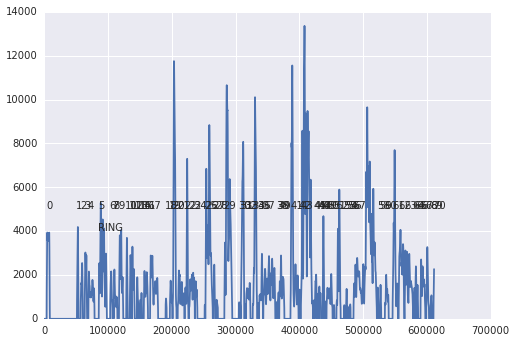

In [10]:
wavs = glob('wavs/labeled/*.wav')
wav = random.choice(wavs)
sample_rate, wav_data = wavfile.read(wav)
wav_data = preprocess(wav_data)
silences, nonsilences = extract_chunks(wav_data)
nonsilence_variances = nonsilence_vars(nonsilences)
preceding_silence_lengths = [next((length for spos, length in silences[::-1] if spos < pos), 0) for pos, ns in nonsilences]
for i, ((pos, ns), var, psl) in enumerate(zip(nonsilences, nonsilence_variances, preceding_silence_lengths)):
    x = pos+200
    plt.text(x=x, y=5000, s=i)
    print('------', i)
    if is_ring(ns, var, psl):
        plt.text(x=x, y=4000, s='RING')
plt.plot(wav_data)